In [1]:
import sys
sys.path.append('../')
from functions import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### データ読込

In [2]:
task, target = 'consistent', 'ClicksSum'
in_dir = f'../data/two_years_each/val/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

../functions.py:28: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return m[x.name.weekday_name]
../functions.py:24: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return 1 if x.name.weekday_name in ['Saturday', 'Sunday'] else 0


### 目的変数の分布

[]

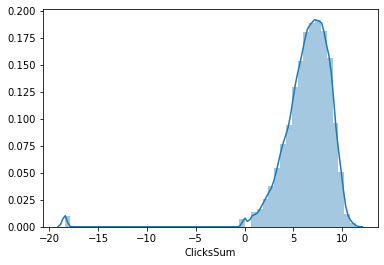

In [3]:
sns.distplot(np.log(df_train_Y[target] + 0.00000001))
plt.plot()

### データ構造転換

In [4]:
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### パラメータのベイズ最適化

In [5]:
#params = optimize()
#params

### xgboost のバリデーションモデルを作成
- 最適化されたパラメータでモデルを作成

In [6]:
params = {'alpha': 4.823655043954879e-07,
 'colsample_bytree': 0.9,
 'eta': 0.225,
 'gamma': 3.226021945051349e-05,
 'lambda': 1.0034293959003492e-06,
 'max_depth': 6,
 'min_child_weight': 8.688868825894192,
 'n_estimators': 176.0,
 'subsample': 0.9500000000000001}

model, evals_result = train2(d_train_sales, d_val_sales, params)
best_iter = model.best_iteration

[0]	train-rmse:5.11826	eval-rmse:5.24527
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:4.03948	eval-rmse:4.08055
[2]	train-rmse:3.21775	eval-rmse:3.17751
[3]	train-rmse:2.60001	eval-rmse:2.48294
[4]	train-rmse:2.13946	eval-rmse:1.94457
[5]	train-rmse:1.80374	eval-rmse:1.53572
[6]	train-rmse:1.56394	eval-rmse:1.22412
[7]	train-rmse:1.39715	eval-rmse:0.987968
[8]	train-rmse:1.28304	eval-rmse:0.814313
[9]	train-rmse:1.20393	eval-rmse:0.687614
[10]	train-rmse:1.15037	eval-rmse:0.597719
[11]	train-rmse:1.10901	eval-rmse:0.535955
[12]	train-rmse:1.0786	eval-rmse:0.495148
[13]	train-rmse:1.06018	eval-rmse:0.469041
[14]	train-rmse:1.03716	eval-rmse:0.449371
[15]	train-rmse:1.02398	eval-rmse:0.435793
[16]	train-rmse:1.00282	eval-rmse:0.428686
[17]	train-rmse:0.993962	eval-rmse:0.424806
[18]	train-rmse:0.977513	eval-rmse:0.422777
[19]	train-rmse:0.964428	eval-rmse:0.421275
[20]	train-r

### 損失関数の曲線

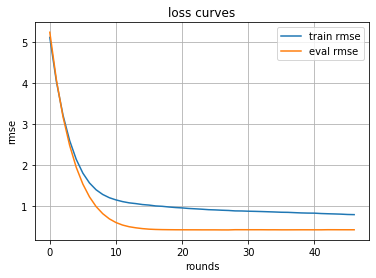

In [7]:
def draw_loss(evals_result):
    train_metric = evals_result['train']['rmse']
    plt.plot(train_metric, label='train rmse')
    eval_metric = evals_result['eval']['rmse']
    plt.plot(eval_metric, label='eval rmse')
    plt.grid()
    plt.legend()
    plt.title('loss curves')
    plt.xlabel('rounds')
    plt.ylabel('rmse')
    plt.show()
draw_loss(evals_result)

### バリデーション結果と実測値

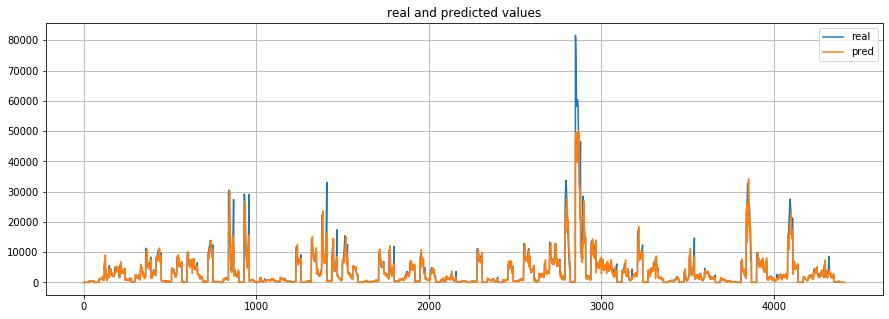

In [8]:
def draw_preds(model, d_val, df_val_Y, target, pred_type='validation'):
    d_pred_log = model.predict(d_val)
    d_pred = np.exp(d_pred_log)
    
    df_val_Y[f'{target}_pred'] = d_pred
    df_val_Y.to_excel(f'./output/{target}_{pred_type}.xlsx')

    plt.figure(figsize=(15,5))
    plt.plot(df_val_Y[target].values, label='real')
    plt.plot(d_pred, label='pred')
    plt.title('real and predicted values')
    plt.legend()
    plt.grid()
    plt.show()
draw_preds(model, d_val, df_val_Y, target)

### 特徴量の寄与度

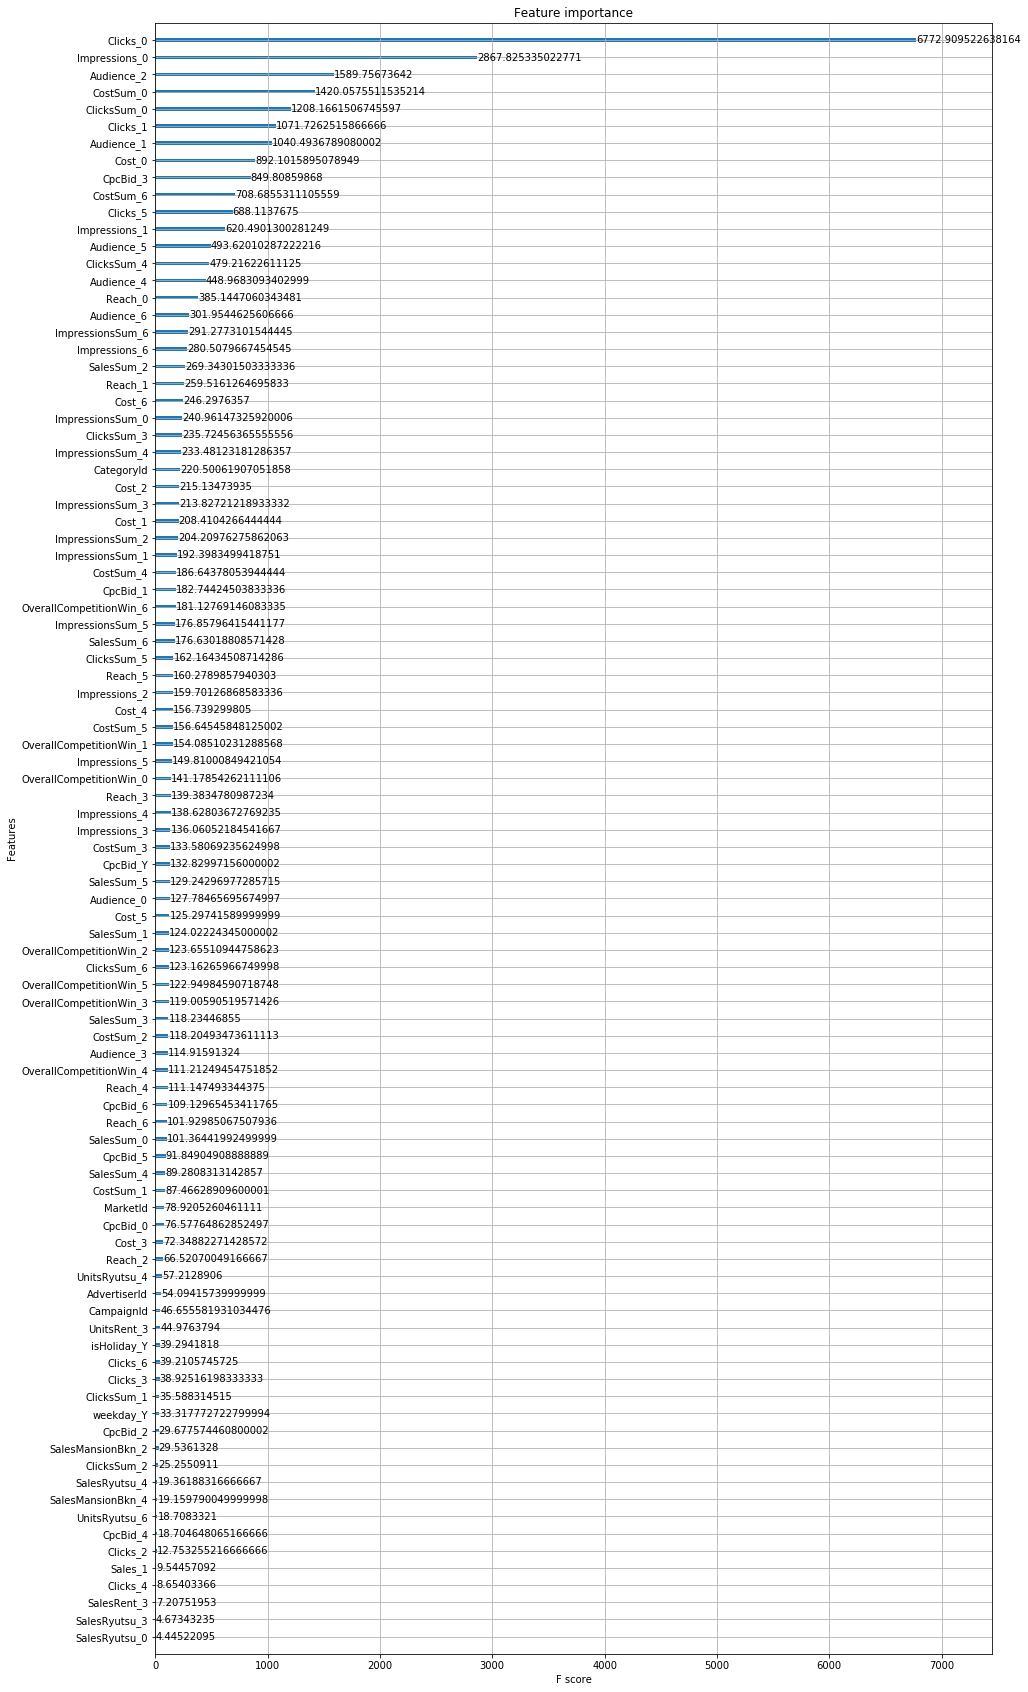

In [9]:
def draw_feat_importances(model):
    _, ax = plt.subplots(figsize=(15,30))
    xgb.plot_importance(model, ax=ax, importance_type='gain')
    plt.show()
draw_feat_importances(model)

In [10]:
fi = get_feat_importances(model)

### 最適化されたパラメータで予測モデルを作成
- テスト１：~2019/12/4を学習して2019/12/5~2019/12/11一週間を予測

In [11]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_1/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [12]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:5.12405	eval-rmse:5.52247
[1]	train-rmse:4.0406	eval-rmse:4.32867
[2]	train-rmse:3.21468	eval-rmse:3.40369
[3]	train-rmse:2.59317	eval-rmse:2.68896
[4]	train-rmse:2.13088	eval-rmse:2.13959
[5]	train-rmse:1.79312	eval-rmse:1.71562
[6]	train-rmse:1.55452	eval-rmse:1.39125
[7]	train-rmse:1.38912	eval-rmse:1.14693
[8]	train-rmse:1.27134	eval-rmse:0.960229
[9]	train-rmse:1.19181	eval-rmse:0.819278
[10]	train-rmse:1.13089	eval-rmse:0.715006
[11]	train-rmse:1.09584	eval-rmse:0.637663
[12]	train-rmse:1.0668	eval-rmse:0.578242
[13]	train-rmse:1.04942	eval-rmse:0.53821
[14]	train-rmse:1.02752	eval-rmse:0.507923
[15]	train-rmse:1.01572	eval-rmse:0.486089
[16]	train-rmse:1.00708	eval-rmse:0.469497
[17]	train-rmse:0.988376	eval-rmse:0.460517
[18]	train-rmse:0.968639	eval-rmse:0.453153
[19]	train-rmse:0.959429	eval-rmse:0.442988
[20]	train-rmse:0.945643	eval-rmse:0.438929
[21]	train-rmse:0.939841	eval-rmse:0.439042
[22]	train-rmse:0.930662	eval-rmse:0.434051
[23]	train-rmse:0.921533	e

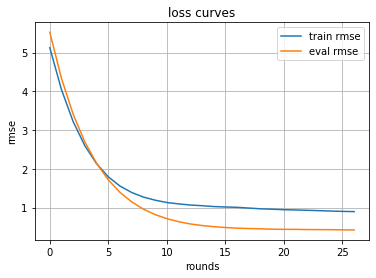

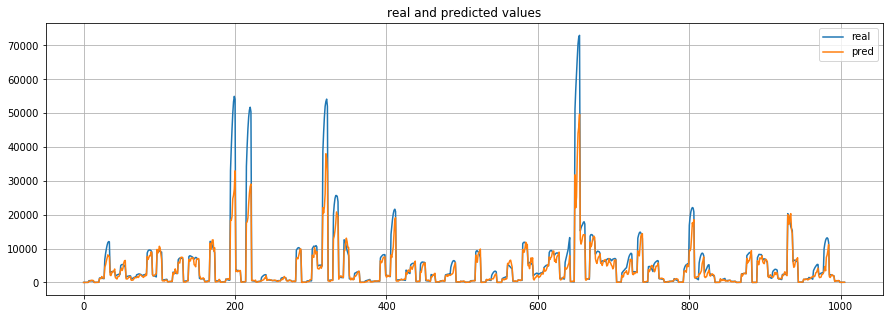

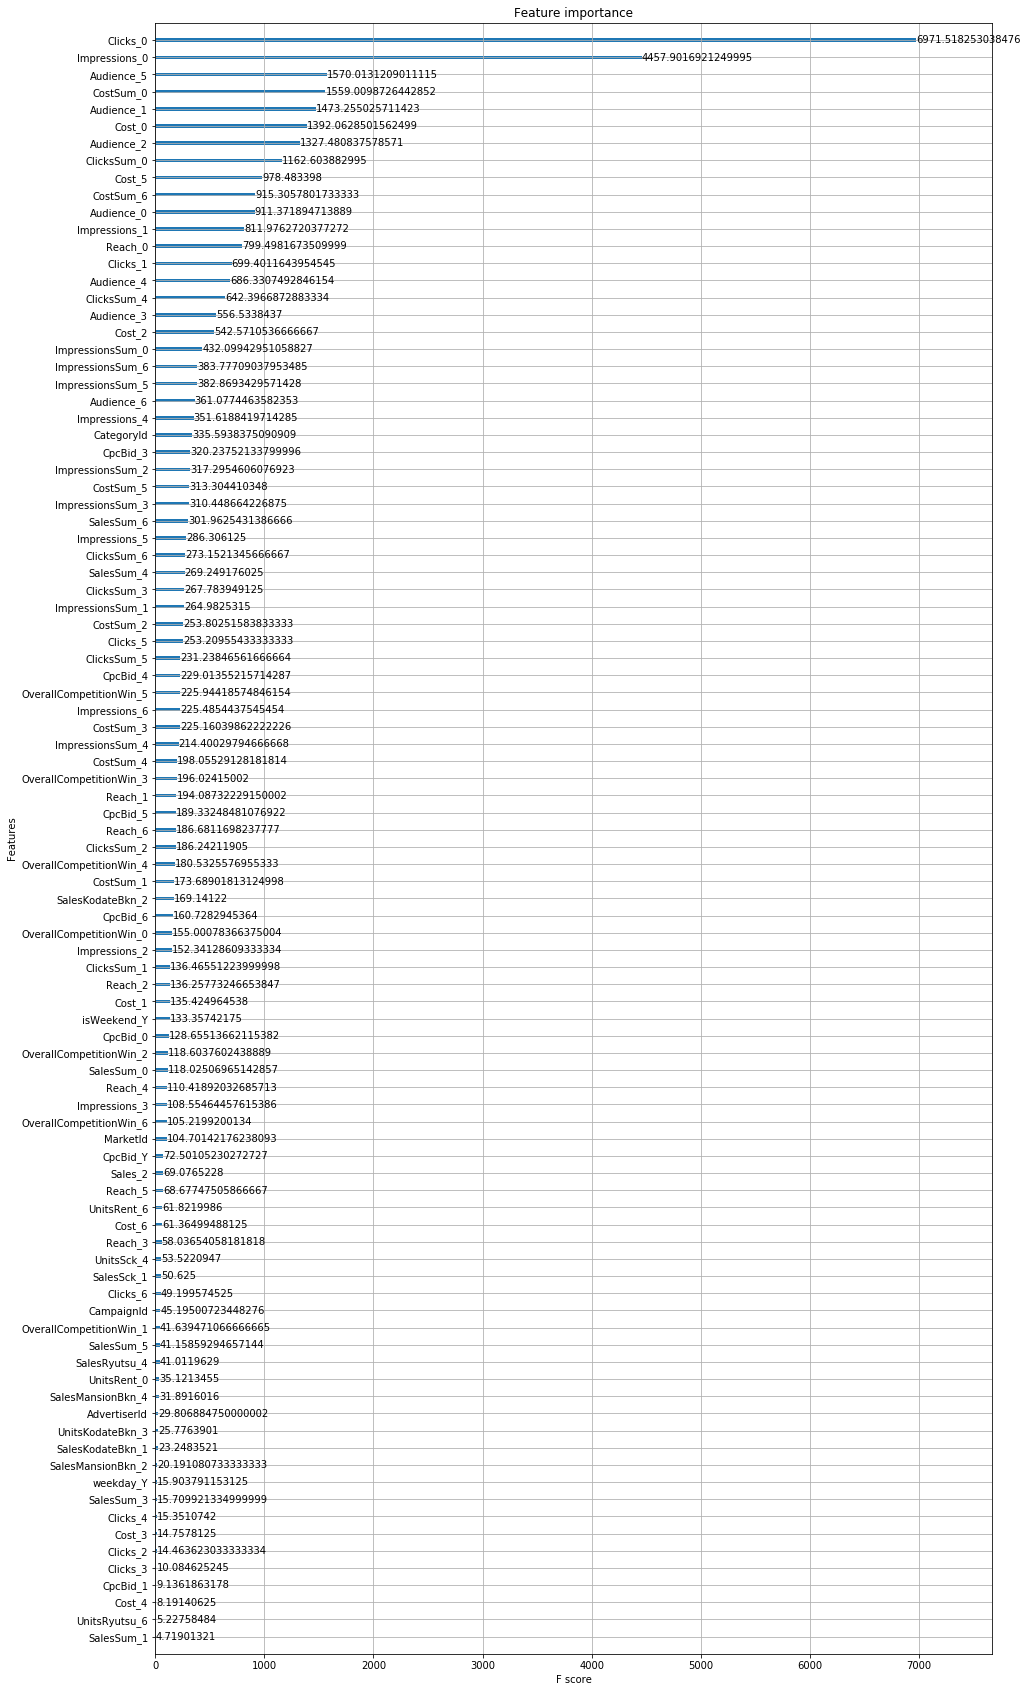

In [13]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test1')
draw_feat_importances(model)

- テスト２：~2019-12-11を学習して2019-12-12~2019-12-18一週間を予測

In [14]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_2/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [15]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:5.12656	eval-rmse:5.3041
[1]	train-rmse:4.04099	eval-rmse:4.06915
[2]	train-rmse:3.21359	eval-rmse:3.11276
[3]	train-rmse:2.59143	eval-rmse:2.37665
[4]	train-rmse:2.12564	eval-rmse:1.81218
[5]	train-rmse:1.78875	eval-rmse:1.38343
[6]	train-rmse:1.54625	eval-rmse:1.06134
[7]	train-rmse:1.37747	eval-rmse:0.822104
[8]	train-rmse:1.25907	eval-rmse:0.653121
[9]	train-rmse:1.17876	eval-rmse:0.545126
[10]	train-rmse:1.12246	eval-rmse:0.484513
[11]	train-rmse:1.08603	eval-rmse:0.453046
[12]	train-rmse:1.05747	eval-rmse:0.471529
[13]	train-rmse:1.02999	eval-rmse:0.468451
[14]	train-rmse:1.01256	eval-rmse:0.470502
[15]	train-rmse:0.998226	eval-rmse:0.47791
[16]	train-rmse:0.982804	eval-rmse:0.509052
[17]	train-rmse:0.973697	eval-rmse:0.514252
[18]	train-rmse:0.968104	eval-rmse:0.51684
[19]	train-rmse:0.958644	eval-rmse:0.518904
[20]	train-rmse:0.947111	eval-rmse:0.520707
[21]	train-rmse:0.943064	eval-rmse:0.522923
[22]	train-rmse:0.935718	eval-rmse:0.52409
[23]	train-rmse:0.922087

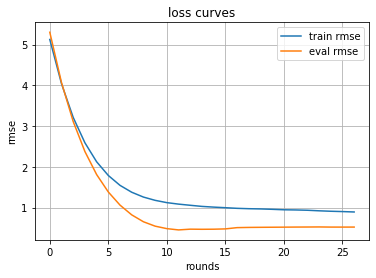

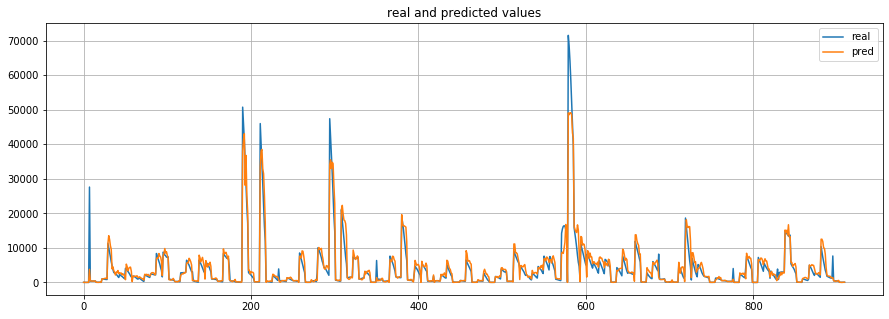

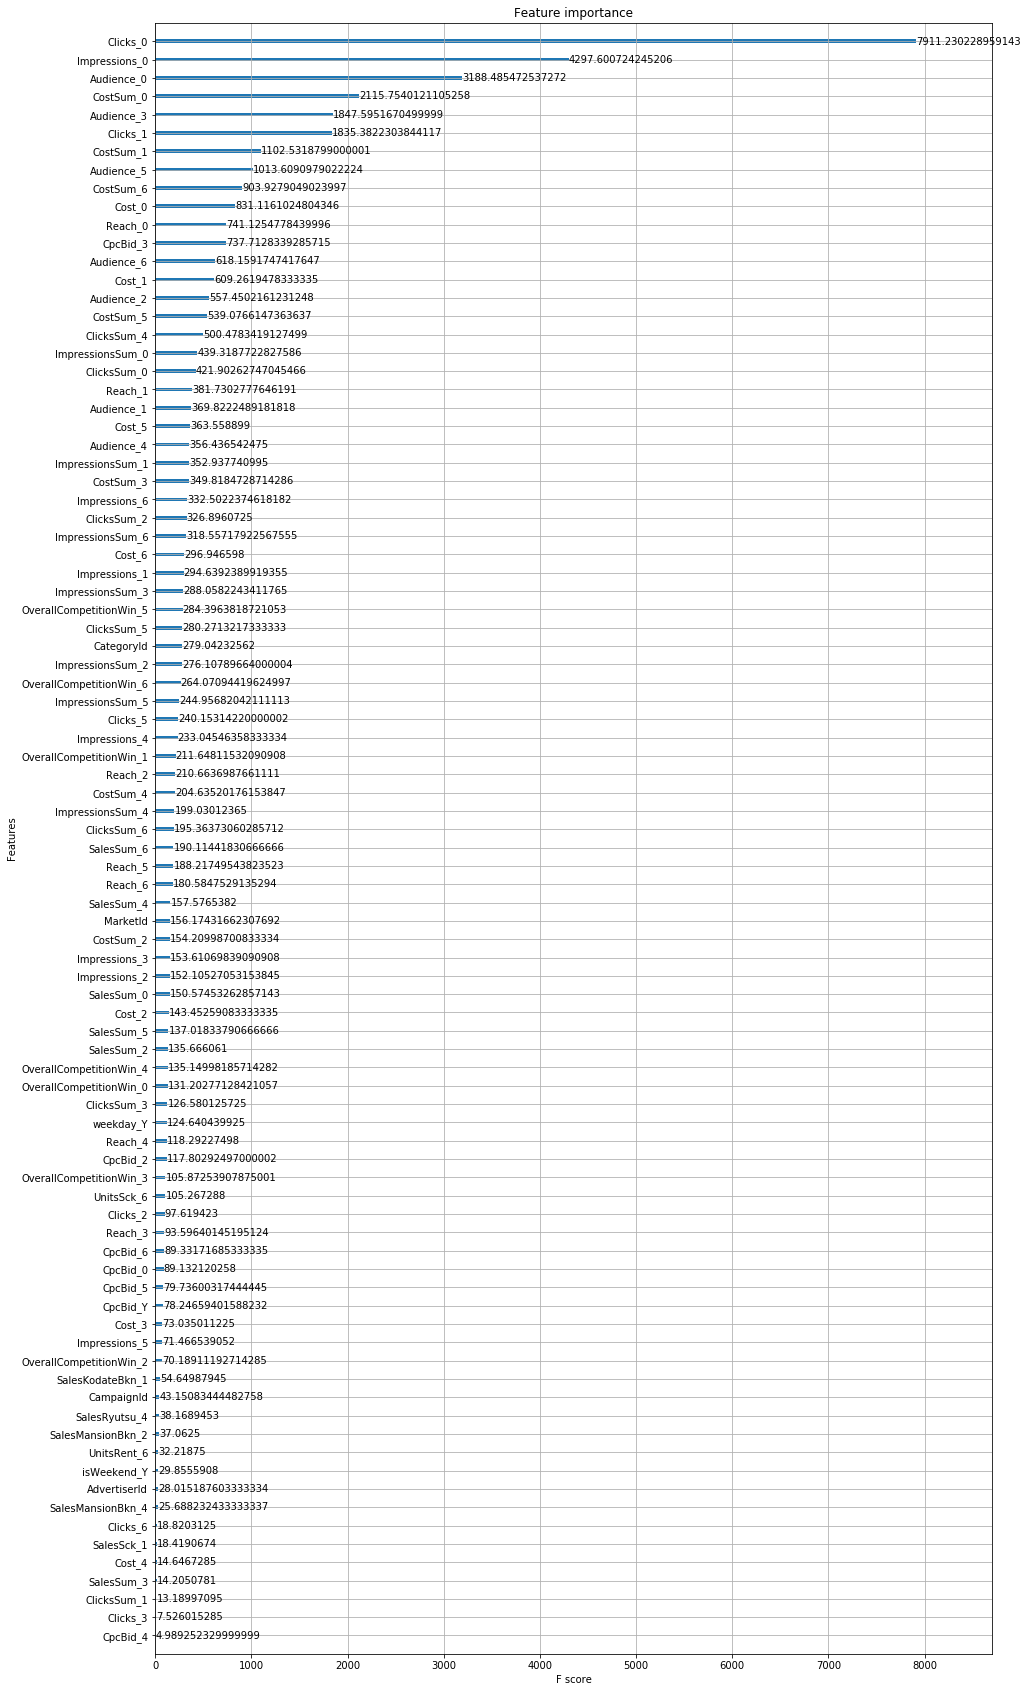

In [16]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test2')
draw_feat_importances(model)